<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_NN/blob/lesson3/GB_NN_intro_hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Попробуйте улучшить работу нейронной сети(разобранную на уроке) обучавшейся на датасет Fashion-MNIST. Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
 

In [3]:
import numpy as np
import keras
import matplotlib.pyplot as plt

import tensorflow.keras as keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
from keras.datasets import fashion_mnist

In [5]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,)


In [6]:
# Normalize the images.
X_train = (X_train / 255.0)
X_test = (X_test / 255.0)

print(X_train.min(), X_train.max())

# Flatten the images.
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

print(X_train.shape) # (60000, 784)
print(X_test.shape)

0.0 1.0
(60000, 784)
(10000, 784)


In [7]:
input_size = X_test.shape[1]

In [9]:
def test_nn(train_images,
            train_labels,
            test_images,
            test_labels,
            n_layers: int = 2,
            n1_neuron: int = 64,
            n2_neuron: int = 64,
            optimizer: str = 'adam',
            n_epochs: int = 5,
            batch_size: int = 32,
            validation_split: float = 0.2,
            verbose=True):
  

  # Build the model.

  model = Sequential()
  model.add(Dense(n1_neuron, input_shape=(input_size,), activation='relu'))
  # model.add(Dense(n2_neuron, activation='tanh'))
  # Если хотим хотим увеличить количество слоёв больше двух, то будем добавлять 
  if n_layers > 2: 
    for k in range(n_layers-2):
      model.add(Dense(n2_neuron, activation='tanh'))

  # выходной слой.
  model.add(Dense(10, activation='softmax'))


  # Compile the model.
  model.compile(
  optimizer=optimizer,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )

  # Train the model.
  history = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=n_epochs,
  batch_size=batch_size,
  validation_split=validation_split,
  verbose=verbose
  )

  # Evaluate the model.
  model.evaluate(
  test_images,
  to_categorical(test_labels)
  )

  return history.history


Label is 2
Label is 2
Label is 0


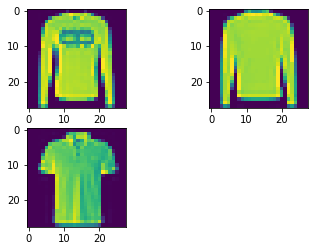

In [ ]:
for i in range(3):
  ind = np.random.randint(0, X_train.shape[0])
  plt.subplot(220 + 1 + i)
  plt.imshow(X_train[ind])
  print(f'Label is {y_train_labels[ind]}')

# Проверка обучения с разным количеством нейронов скрытого слоя

In [10]:
res_dict_4={}
x = np.linspace(1, 20, 20)
for n_neurons in [2, 4, 8, 32, 96, 192]:
    res_dict_4[n_neurons] = test_nn(X_train, y_train_labels, X_test, y_test_labels,
                                   n1_neuron=n_neurons,
                                   n2_neuron=None,
                                   n_layers=2,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.3582 - accuracy: 0.8813


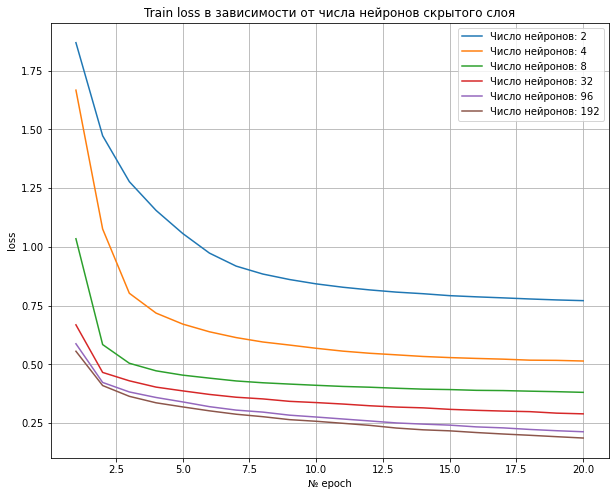

In [11]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict_4:
        plt.plot(x, res_dict_4[n_neur]['loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Train loss в зависимости от числа нейронов скрытого слоя')
plt.show()

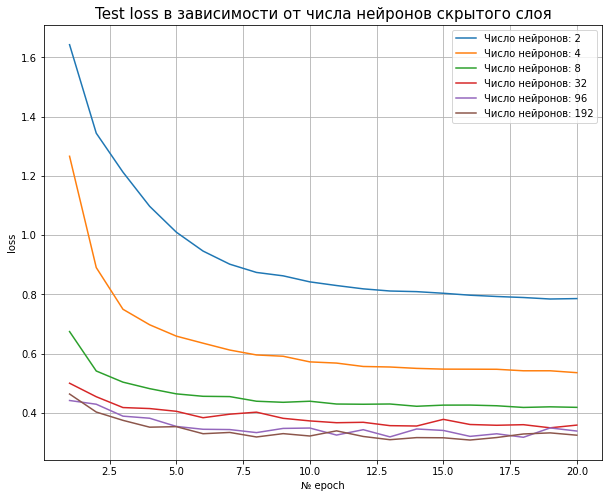

In [14]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict_4:
        plt.plot(x, res_dict_4[n_neur]['val_loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Test loss в зависимости от числа нейронов скрытого слоя', size=15)
plt.show()

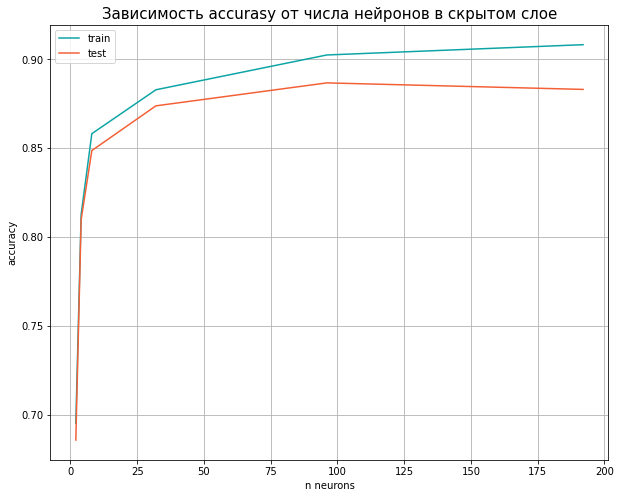

In [15]:
n_n = [2, 4, 8, 32, 96, 192]

res_train = [res_dict_4[n_neur]['accuracy'][10] for n_neur in res_dict_4]
res_test = [res_dict_4[n_neur]['val_accuracy'][10] for n_neur in res_dict_4]

plt.figure(figsize=(10, 8))
plt.plot(n_n, res_train, label='train', c='#0CA4A5')
plt.plot(n_n, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа нейронов в скрытом слое', size=15)
plt.grid()
plt.xlabel('n neurons')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Проверка обучения с разным количеством скрытых слоев

In [16]:
# (2, 3, 5, 10) - кол-во слоев
res_dict_5 = {}
num_layers = (2, 3, 5, 10)
x = np.linspace(1, 20, 20)
for n in num_layers:
    res_dict_5[n] = test_nn(X_train, y_train_labels, X_test, y_test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=n,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.3778 - accuracy: 0.8720


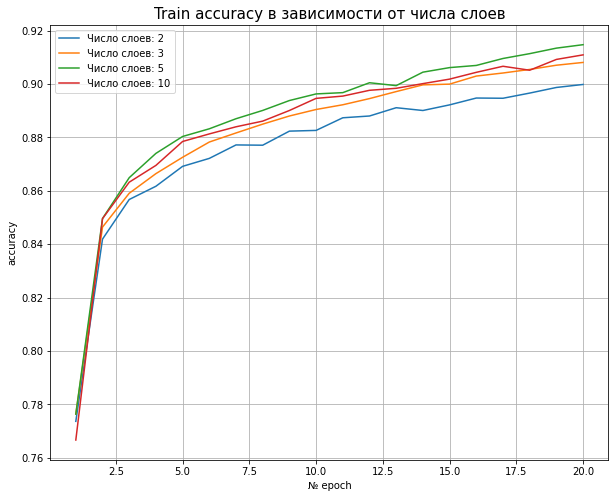

In [17]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_5:
        plt.plot(x, res_dict_5[n_layers]['accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от числа слоев', size=15)
plt.show()

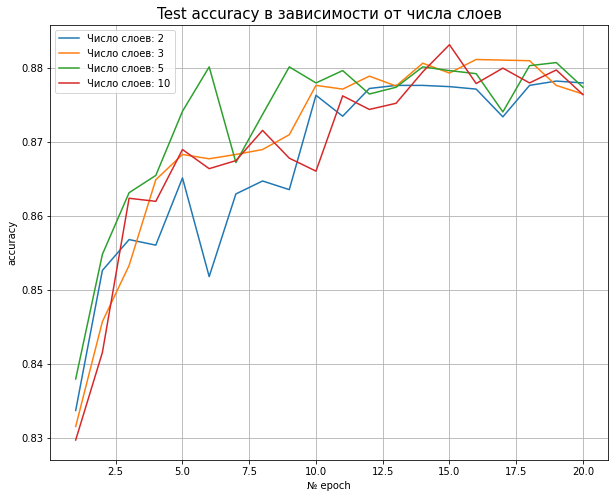

In [18]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_5:
        plt.plot(x, res_dict_5[n_layers]['val_accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от числа слоев', size=15)
plt.show()

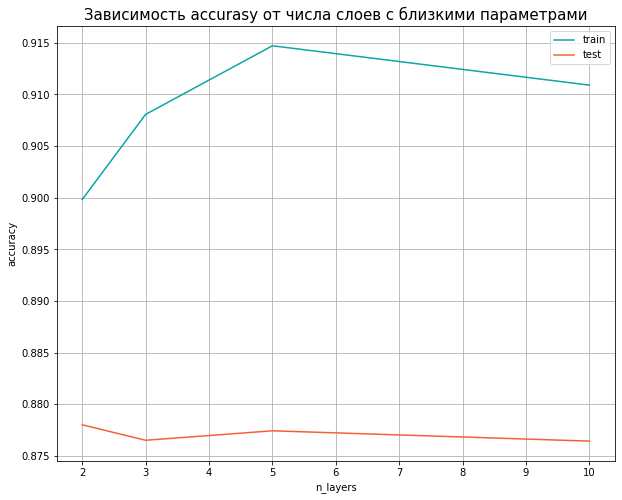

In [19]:
res_train = [res_dict_5[n_lay]['accuracy'][19] for n_lay in res_dict_5]
res_test = [res_dict_5[n_lay]['val_accuracy'][19] for n_lay in res_dict_5]

plt.figure(figsize=(10, 8))
plt.plot(num_layers, res_train, label='train', c='#0CA4A5')
plt.plot(num_layers, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('n_layers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Провeрка обучения с разными оптимизаторами

In [20]:
res_dict_6 = {}
optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
x = np.linspace(1, 20, 20)
for optim in optimizers:
    res_dict_6[optim] = test_nn(X_train, y_train_labels, X_test, y_test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=3,
                                   optimizer=optim,
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8727


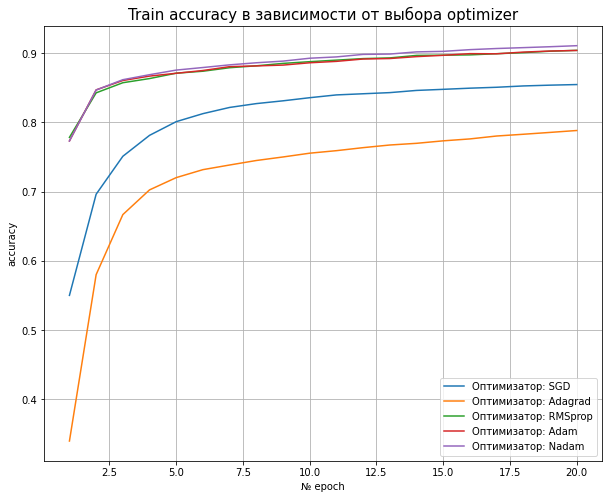

In [21]:
plt.figure(figsize=(10, 8))
for optim in res_dict_6:
        plt.plot(x, res_dict_6[optim]['accuracy'], label=f'Оптимизатор: {optim}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от выбора optimizer', size=15)
plt.show()

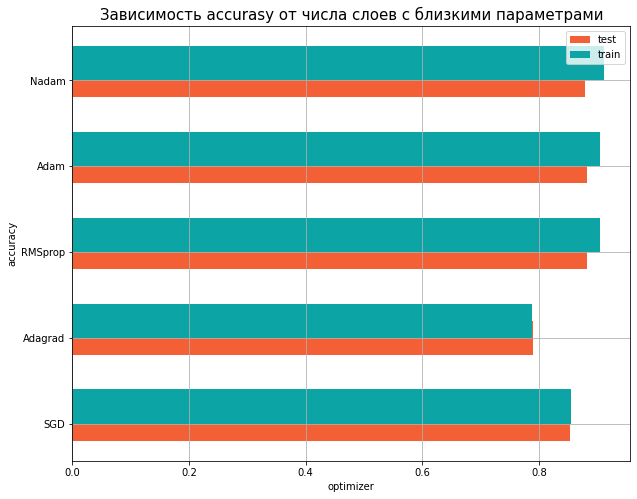

In [22]:
# optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
res_train = [res_dict_6[optim]['accuracy'][19] for optim in res_dict_6]
res_test = [res_dict_6[optim]['val_accuracy'][19] for optim in res_dict_6]

plt.figure(figsize=(10, 8))

plt.barh(optimizers, res_test, label='test', color='#F46036', height=0.4)
plt.barh(optimizers, res_train, label='train', color='#0CA4A5', height=0.4, align='edge')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('optimizer')
plt.ylabel('accuracy')
plt.legend()
plt.show()

2. Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow неразобранные на уроке.

In [23]:
res_dict_7 = {}
batch_size = [32, 128, 256, 372, 500, 700]
x = np.linspace(1, 20, 20)
for batch in batch_size:
    res_dict_7[batch] = test_nn(X_train, y_train_labels, X_test, y_test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=3,
                                   optimizer='Nadam',
                                   n_epochs=20,
                                   batch_size=batch,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.3861 - accuracy: 0.8606


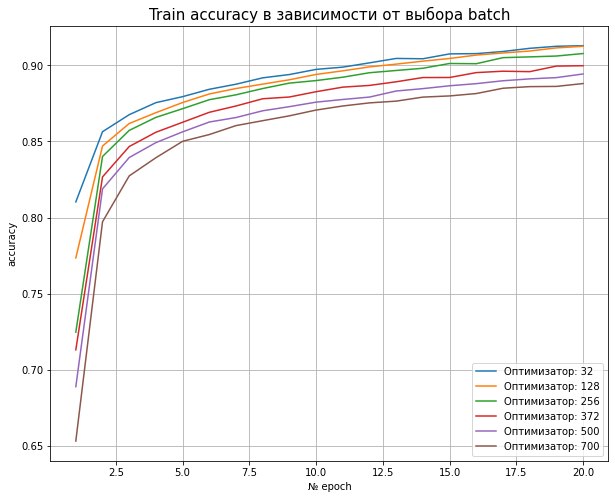

In [25]:
plt.figure(figsize=(10, 8))
for batch in res_dict_7:
        plt.plot(x, res_dict_7[batch]['accuracy'], label=f'Оптимизатор: {batch}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от выбора batch', size=15)
plt.show()

Видим, что чем меньше batch size, тем результаты улучшаются.